In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv("C:\\Users\Bhavani\OneDrive\Desktop\durga\Project\AB_NYC_2019.csv")


In [3]:
imputer = SimpleImputer(strategy='mean')
numeric_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'avalability_365']
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])


In [4]:
data_deduplicated = data.drop_duplicates()


In [5]:
data_deduplicated.to_csv('cleaned_dataset.csv', index=False)

In [6]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  float64
 11  number_of_reviews               48895 non-null  float64
 12  last_review

In [7]:
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
avalability_365                       0
dtype: int64


In [8]:
data.columns = map(str.lower, data.columns)


In [9]:
print("\nLatitude Range:", data['latitude'].min(), "-", data['latitude'].max())
print("Longitude Range:", data['longitude'].min(), "-", data['longitude'].max())



Latitude Range: 40.49979 - 40.91306
Longitude Range: -74.24442 - -73.71299


In [10]:
data.dropna(subset=['latitude', 'longitude'], inplace=True)

In [11]:
expected_room_types = ['Entire home/apt', 'Private room', 'Shared room']
invalid_room_types = data[~data['room_type'].isin(expected_room_types)]
if not invalid_room_types.empty:
    print("\nInvalid Room Types Found:")
    print(invalid_room_types['room_type'].value_counts())

In [12]:
print("\nData cleaning completed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'.")


Data cleaning completed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'.


In [13]:
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_mode.fit_transform(data[categorical_columns])


In [14]:
data_unique = data.drop_duplicates()
print("\nFinal Duplicate Records Summary after Elimination:")
print("Number of duplicate records:", data_unique.duplicated().sum())



Final Duplicate Records Summary after Elimination:
Number of duplicate records: 0


In [15]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


In [16]:
z_score_threshold = 3 
price_z_scores = (data['price'] - data['price'].mean()) / data['price'].std()
outliers = data[abs(price_z_scores) > z_score_threshold]


In [17]:
data_no_outliers = data[abs(price_z_scores) <= z_score_threshold]


In [18]:
numeric_columns = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                   'calculated_host_listings_count', 'avalability_365']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [19]:
print("Initial Summary Statistics:")
print(data.describe())

Initial Summary Statistics:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  4.889500e+04  4.889500e+04  4.889500e+04   
mean   1.901714e+07  6.762001e+07  3.926898e-14  1.660974e-13  3.720195e-17   
std    1.098311e+07  7.861097e+07  1.000010e+00  1.000010e+00  1.000010e+00   
min    2.539000e+03  2.438000e+03 -4.202474e+00 -6.331760e+00 -6.359342e-01   
25%    9.471945e+06  7.822033e+06 -7.124376e-01 -6.694733e-01 -3.486158e-01   
50%    1.967728e+07  3.079382e+07 -1.078110e-01 -7.605436e-02 -1.945465e-01   
75%    2.915218e+07  1.074344e+08  6.265619e-01  3.443653e-01  9.277183e-02   
max    3.648724e+07  2.743213e+08  3.376357e+00  5.181954e+00  4.100441e+01   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    4.889500e+04       4.889500e+04       4.889500e+04   
mean     1.104433e-17       1.860098e-17       2.790146e-17   
std      1.000010e+00       1.000010e+00       1.000010e+00   
min     

In [20]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print("\nOutliers:")
print(outliers)


Outliers:
             id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                

In [21]:
median_price = data['price'].median()
data['price'] = np.where((data['price'] < lower_bound) | (data['price'] > upper_bound), median_price, data['price'])


In [22]:
scaler = RobustScaler()
numeric_columns = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                   'calculated_host_listings_count', 'avalability_365']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
print("\nFinal Summary Statistics after Outlier Treatment:")
print(data.describe())


Final Summary Statistics after Outlier Treatment:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07      0.080516      0.075016      0.161990   
std    1.098311e+07  7.861097e+07      0.746834      0.986360      0.816429   
min    2.539000e+03  2.438000e+03     -3.058002     -6.170317     -1.308642   
25%    9.471945e+06  7.822033e+06     -0.451551     -0.585319     -0.456790   
50%    1.967728e+07  3.079382e+07      0.000000      0.000000      0.000000   
75%    2.915218e+07  1.074344e+08      0.548449      0.414681      0.543210   
max    3.648724e+07  2.743213e+08      2.602068      5.186238      2.814815   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         1.007491           0.794542           0.117863   
std          5.127637           1.936982        

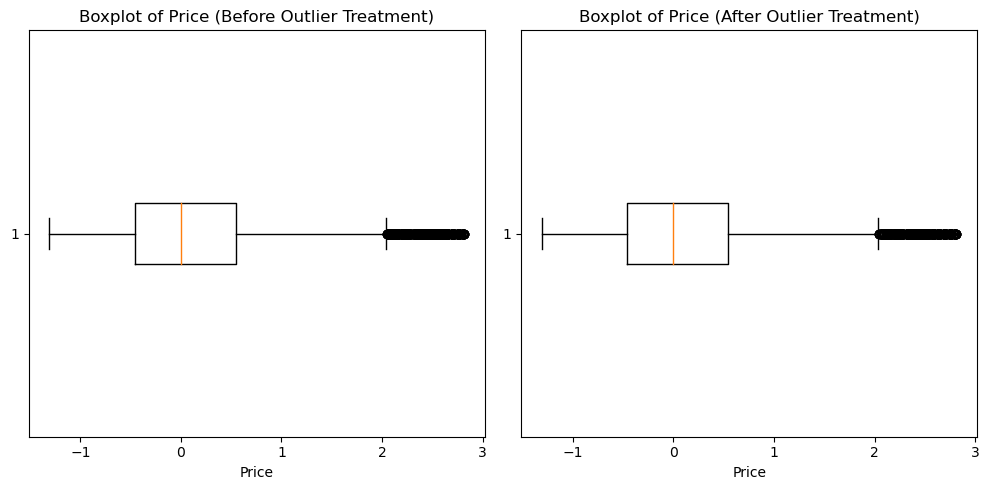

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['price'], vert=False)
plt.title('Boxplot of Price (Before Outlier Treatment)')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
plt.boxplot(data['price'], vert=False)
plt.title('Boxplot of Price (After Outlier Treatment)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


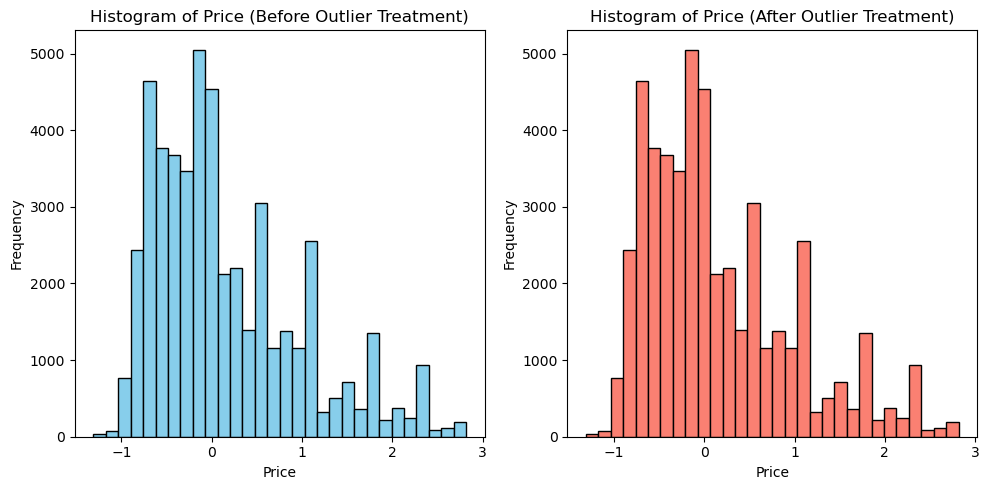

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (Before Outlier Treatment)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['price'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Price (After Outlier Treatment)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


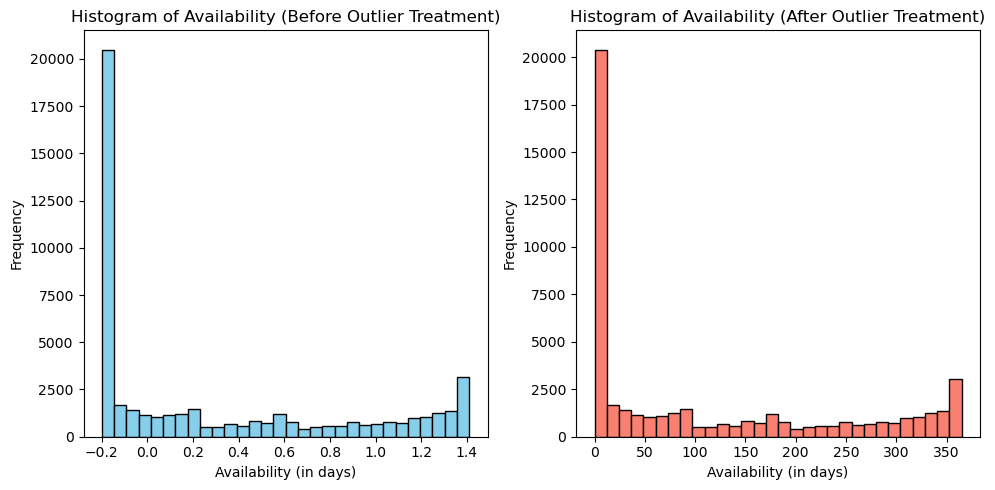

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['avalability_365'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Availability (Before Outlier Treatment)')
plt.xlabel('Availability (in days)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_no_outliers['avalability_365'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Availability (After Outlier Treatment)')
plt.xlabel('Availability (in days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
